<a href="https://colab.research.google.com/github/vivianchen98/face_recognition/blob/master/face_recognition_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 108kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=d33944dfa6be192e17d9050c33ef11664e7a767e91182c537c6571c2fdc772c5
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
!mkdir known
!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X.jpg -O known/bill.jpg
!wget https://www.cmu.edu/news/stories/archives/2019/march/images/turing-award-hinton-900x600-min.jpg -O known/hinton.jpg

--2020-07-19 16:41:03--  https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 192.229.237.101
Connecting to pbs.twimg.com (pbs.twimg.com)|192.229.237.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24875 (24K) [image/jpeg]
Saving to: ‘known/bill.jpg’

known/bill.jpg      100%[===================>]  24.29K  --.-KB/s    in 0s      

2020-07-19 16:41:03 (148 MB/s) - ‘known/bill.jpg’ saved [24875/24875]

--2020-07-19 16:41:04--  https://www.cmu.edu/news/stories/archives/2019/march/images/turing-award-hinton-900x600-min.jpg
Resolving www.cmu.edu (www.cmu.edu)... 128.2.42.52
Connecting to www.cmu.edu (www.cmu.edu)|128.2.42.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63045 (62K) [image/jpeg]
Saving to: ‘known/hinton.jpg’

known/hinton.jpg    100%[===================>]  61.57K   108KB/s    in 0.6s    

2020-07-19 16:41:06 (108 KB/s) - ‘known/hinton.jpg’ saved [63045/63045]


In [ ]:
!mkdir unknown
!wget https://media.wired.com/photos/5c1002bdbbcfae2d7b3dea28/master/pass/hinton1-FINAL.jpg -O unknown/1.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Bill_Gates_2018.jpg/220px-Bill_Gates_2018.jpg -O 2.jpg

mkdir: cannot create directory ‘unknown’: File exists
--2020-07-19 16:42:26--  https://media.wired.com/photos/5c1002bdbbcfae2d7b3dea28/master/pass/hinton1-FINAL.jpg
Resolving media.wired.com (media.wired.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.wired.com (media.wired.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87672 (86K) [image/jpeg]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]  85.62K  --.-KB/s    in 0.03s   

2020-07-19 16:42:26 (2.82 MB/s) - ‘unknown/1.jpg’ saved [87672/87672]

--2020-07-19 16:42:27--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Bill_Gates_2018.jpg/220px-Bill_Gates_2018.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21565 (21K) [image/j

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
def read_img(path):
  img = cv2.imread(path)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width/float(w)
  height = int(h*ratio)
  return cv2.resize(img, (width, height))

Processing 2.jpg


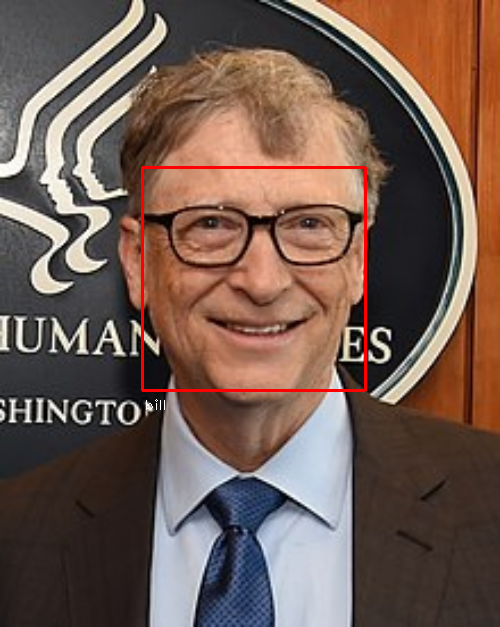

Processing 1.jpg


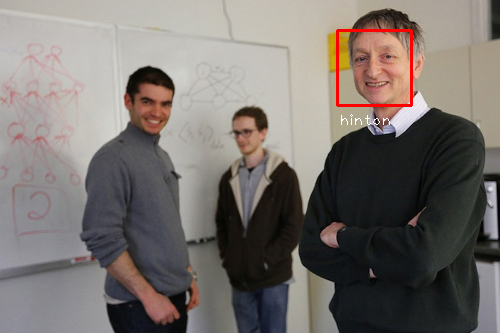

In [ ]:
known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encodings.append(img_enc)
  known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
  print("Processing", file)
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  
  results = face_recognition.compare_faces(known_encodings, img_enc)
  
  for i in range(len(results)):
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top), (right, bottom), (0,0,255), 2)
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
      cv2_imshow(img)